In [ ]:
from tensorflow.keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) =  reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
#decode the data back to words
word_index = reuters.get_word_index()
reverse_word_indext = dict(
    [(value, key) for (key,value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_indext.get(i-3,"?") for i in train_data[0]]
)

550378/550378 [==============================] - 0s 1us/step


In [ ]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
train_labels[10]

3

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")]
)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_val = x_train[1000:]
y_val = y_train[:1000]
partial_y_val = y_train[1000:]

In [ ]:
history = model.fit(partial_x_val, partial_y_val, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.6861 - accuracy: 0.4806 - val_loss: 1.8046 - val_accuracy: 0.6220
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.5357 - accuracy: 0.6763 - val_loss: 1.3555 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 1s 56ms/step - loss: 1.1710 - accuracy: 0.7424 - val_loss: 1.1706 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.9545 - accuracy: 0.7930 - val_loss: 1.0746 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.7914 - accuracy: 0.8339 - val_loss: 1.0105 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6594 - accuracy: 0.8621 - val_loss: 0.9819 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5550 - accuracy: 0.8860 - val_loss: 0.9279 - val_accuracy: 0.7970
Epoch 8/20
16

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

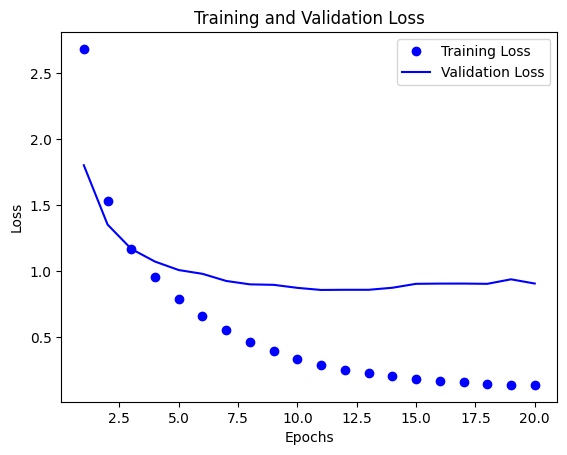

In [ ]:
import matplotlib.pyplot as plt
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

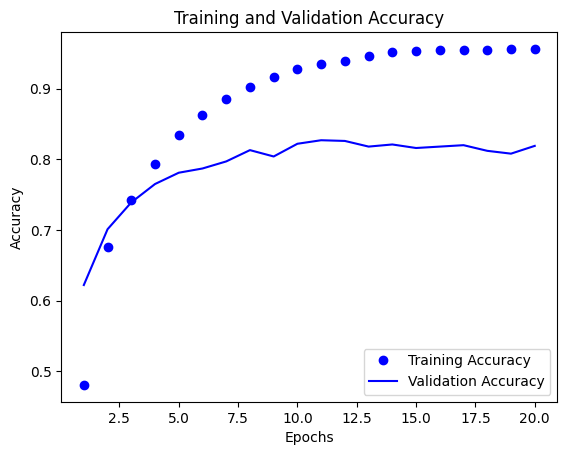

In [ ]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [ ]:
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 50ms/step - loss: 2.7857 - accuracy: 0.4913
Epoch 2/9
18/18 [==============================] - 1s 47ms/step - loss: 1.5533 - accuracy: 0.6661
Epoch 3/9
18/18 [==============================] - 1s 65ms/step - loss: 1.1843 - accuracy: 0.7370
Epoch 4/9
18/18 [==============================] - 2s 84ms/step - loss: 0.9602 - accuracy: 0.7915
Epoch 5/9
18/18 [==============================] - 1s 73ms/step - loss: 0.7913 - accuracy: 0.8292
Epoch 6/9
18/18 [==============================] - 1s 48ms/step - loss: 0.6606 - accuracy: 0.8539
Epoch 7/9
18/18 [==============================] - 1s 50ms/step - loss: 0.5519 - accuracy: 0.8811
Epoch 8/9
18/18 [==============================] - 1s 51ms/step - loss: 0.4686 - accuracy: 0.9011
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9715 - accuracy: 0.7774


In [ ]:
results

[0.9715293645858765, 0.7773820161819458]

In [ ]:
#set baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels)==np.array(test_labels_copy)
hits_array.mean()

0.19723953695458593

In [ ]:
hits_array

array([ True, False, False, ...,  True, False, False])

In [ ]:
predictions = model.predict(x_test)


71/71 [==============================] - 0s 3ms/step


In [ ]:
np.argmax(predictions[0])

3

In [26]:
#information bottlenect exaple
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_val,
           partial_y_val,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val)
           )


Epoch 1/20
16/16 [==============================] - 2s 81ms/step - loss: 3.5226 - accuracy: 0.0608 - val_loss: 3.2782 - val_accuracy: 0.1190
Epoch 2/20
16/16 [==============================] - 1s 57ms/step - loss: 3.1203 - accuracy: 0.2251 - val_loss: 2.9494 - val_accuracy: 0.2530
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 2.7927 - accuracy: 0.2528 - val_loss: 2.6729 - val_accuracy: 0.2660
Epoch 4/20
16/16 [==============================] - 1s 56ms/step - loss: 2.5219 - accuracy: 0.2655 - val_loss: 2.4395 - val_accuracy: 0.2630
Epoch 5/20
16/16 [==============================] - 1s 78ms/step - loss: 2.2825 - accuracy: 0.2742 - val_loss: 2.2129 - val_accuracy: 0.2740
Epoch 6/20
16/16 [==============================] - 2s 94ms/step - loss: 2.0400 - accuracy: 0.3483 - val_loss: 1.9935 - val_accuracy: 0.5680
Epoch 7/20
16/16 [==============================] - 1s 78ms/step - loss: 1.8210 - accuracy: 0.5966 - val_loss: 1.8158 - val_accuracy: 0.6080
Epoch 8/20
16